/var/folders/tn/v9tpvrrs4qgdbw0xd1q0l8qh0000gn/T/ipykernel_90574/3304491861.py:55: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contourf(x_grid, y_grid, x_grid*0, colors='lightgray', alpha=0.5, label='span(z, w)') # Fill with light gray


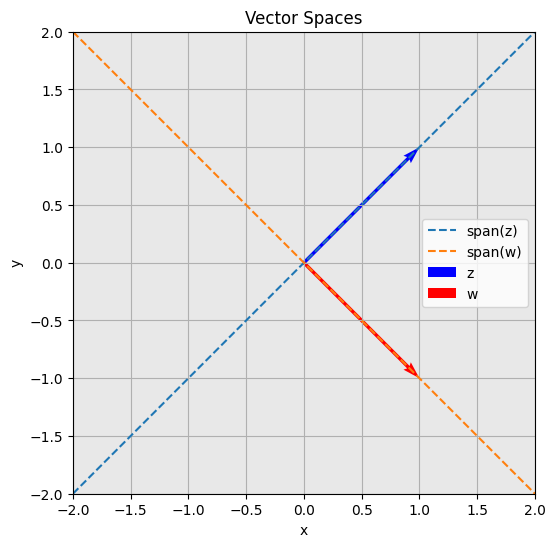

d) z and w are orthogonal: True
e) {z, w} form an orthonormal basis: True


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define the vectors
z = np.array([1, 1])
w = np.array([1, -1])

# a) Subspace spanned by z
z_span = np.linspace(-2*z[0], 2*z[0], 10)  # Adjust range as needed
z_span_y = z_span * z[1]/z[0]

# b) Subspace spanned by w
w_span = np.linspace(-2*w[0], 2*w[0], 10)  # Adjust range as needed
w_span_y = w_span * w[1]/w[0]

# c) Span {z, w} in R^2
# Since z and w are linearly independent in R^2, their span is the entire R^2 plane.

# d) Orthogonality
is_orthogonal = np.dot(z, w) == 0

# e) Orthonormal basis
norm_z = np.linalg.norm(z)
norm_w = np.linalg.norm(w)

z_unit = z / norm_z
w_unit = w / norm_w

# Check if they are orthonormal
is_orthonormal = np.allclose(np.dot(z_unit, z_unit), 1) and np.allclose(np.dot(w_unit, w_unit), 1) and np.allclose(np.dot(z_unit, w_unit), 0)

# If not orthonormal, modify to form an orthonormal basis (Gram-Schmidt process)
if not is_orthonormal:
    # Project w onto z
    proj_w_on_z = (np.dot(w, z_unit) / np.dot(z_unit, z_unit)) * z_unit
    # Subtract the projection from w to get an orthogonal vector
    w_orth = w - proj_w_on_z
    # Normalize the orthogonal vector
    w_orth_unit = w_orth / np.linalg.norm(w_orth)
    
    z_unit = z_unit  # z_unit remains the same
    w_unit = w_orth_unit  # Use the orthogonalized and normalized w

# --- Plotting ---
plt.figure(figsize=(6, 6))

# a) Subspace spanned by z
plt.plot(z_span, z_span_y, '--', label='span(z)')

# b) Subspace spanned by w
plt.plot(w_span, w_span_y, '--', label='span(w)')

# c) Span {z, w} in R^2 (Indicated by the filled area)
x_grid, y_grid = np.meshgrid(np.linspace(-2, 2, 100), np.linspace(-2, 2, 100))  # Adjust range as needed
plt.contourf(x_grid, y_grid, x_grid*0, colors='lightgray', alpha=0.5, label='span(z, w)') # Fill with light gray

# Plot the original vectors
plt.quiver(0, 0, z[0], z[1], angles='xy', scale_units='xy', scale=1, color='blue', label='z')
plt.quiver(0, 0, w[0], w[1], angles='xy', scale_units='xy', scale=1, color='red', label='w')

# Plot the orthonormal basis vectors (if computed)
if not is_orthonormal:
    plt.quiver(0, 0, z_unit[0], z_unit[1], angles='xy', scale_units='xy', scale=1, color='cyan', label='z_unit')
    plt.quiver(0, 0, w_unit[0], w_unit[1], angles='xy', scale_units='xy', scale=1, color='magenta', label='w_unit')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Vector Spaces')
plt.grid()
plt.legend()
plt.xlim(-2, 2)  # Adjust range as needed
plt.ylim(-2, 2)  # Adjust range as needed
plt.gca().set_aspect('equal', adjustable='box')  # Set aspect ratio to equal
plt.show()

# Print results
print("d) z and w are orthogonal:", is_orthogonal)
print("e) {z, w} form an orthonormal basis:", is_orthonormal)

if not is_orthonormal:
    print("Orthonormal basis vectors: z_unit =", z_unit, ", w_unit =", w_unit)

In [2]:
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt 

in_data = loadmat('movie.mat')
#loadmat() loads a matlab workspace into a python dictionary, where the names of the variables are the keys 
#in the dictionary.  To see what variables are loaded, uncomment the line below: 
#print([key for key in in_data])

X = in_data['M']
print(X)


[[ 4  7  2  8  7  4  2]
 [ 9  3  5  6 10  5  5]
 [ 4  8  3  7  6  4  1]
 [ 9  2  6  5  9  5  4]
 [ 4  9  2  8  7  4  1]]


In [3]:
# Question 3a
r = np.linalg.matrix_rank(X)
r

5

In [4]:
# Question 3b
m = 7
n = 5
# T dimemsions are m x r
# W dimensions are r x n


In [5]:
# Question 3c
col_sums= np.sum(X, axis=0)
print(col_sums)
# X_:j = t_1 * w_1j
w_1j = col_sums /  np.sqrt(5)
w_1j

[30 29 18 34 39 22 13]


array([13.41640786, 12.96919427,  8.04984472, 15.20526225, 17.44133022,
        9.8386991 ,  5.81377674])

In [6]:
# Question 3d
t1 = np.ones((5, 1)) / np.sqrt(5)
w1 = w_1j.reshape(1,7)
X_approx = t1 @ w1
X_approx

array([[6. , 5.8, 3.6, 6.8, 7.8, 4.4, 2.6],
       [6. , 5.8, 3.6, 6.8, 7.8, 4.4, 2.6],
       [6. , 5.8, 3.6, 6.8, 7.8, 4.4, 2.6],
       [6. , 5.8, 3.6, 6.8, 7.8, 4.4, 2.6],
       [6. , 5.8, 3.6, 6.8, 7.8, 4.4, 2.6]])

In [7]:
# Question 3e
baseline_ratings = np.sum(X, axis=1)
print(baseline_ratings)
highest_baseline_friend = np.argmax(baseline_ratings)
print(f"{highest_baseline_friend}  Jennifer")
lowest_baseline_friend = np.argmin(baseline_ratings)
print(f"{lowest_baseline_friend}  Jada")


[34 43 33 40 35]
1  Jennifer
2  Jada


In [8]:
# Question 3f
residual = X - X_approx
residual
# The residual matrix represents the portion of the original ratings matrix X that is not explained by the rank-1 approximation
# for every person we can see that either 3 or 2 values are negative repersenting that each person perfers either sci-fi or romance movies


array([[-2. ,  1.2, -1.6,  1.2, -0.8, -0.4, -0.6],
       [ 3. , -2.8,  1.4, -0.8,  2.2,  0.6,  2.4],
       [-2. ,  2.2, -0.6,  0.2, -1.8, -0.4, -1.6],
       [ 3. , -3.8,  2.4, -1.8,  1.2,  0.6,  1.4],
       [-2. ,  3.2, -1.6,  1.2, -0.8, -0.4, -1.6]])